> ### Multinomial Naive Bayes with Basic NLP

> https://iq.opengenus.org/text-classification-naive-bayes/

> You need to refer to Svm lecture exercise for doing it other way around  

In [14]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_20newsgroups

# We defined the categories which we want to classify
categories = ['rec.motorcycles', 'sci.electronics','sci.med','comp.graphics']

# sklearn provides us with subset data for training and testing
X_train = fetch_20newsgroups(subset='train',
                                categories=categories, shuffle=True, random_state=42)





# Let's look at categories of our first ten training data
for t in X_train.target[:8]:
    print(X_train.target_names[t])

comp.graphics
comp.graphics
rec.motorcycles
comp.graphics
sci.med
sci.electronics
sci.electronics
comp.graphics


In [2]:
#printing target
print(X_train.target_names)

['comp.graphics', 'rec.motorcycles', 'sci.electronics', 'sci.med']


In [3]:
#getting first data set
#print("\n".join(X_train.data[0:1]))


In [4]:
#getting first target label
print(X_train.target_names[X_train.target[4]])

#this will give target value index as accordance with line 11.
print(X_train.target[X_train.target[4]])

# fifth dataset has this label in the form of 0 to 3 .
#Target 5 answer =2 means sci.electronics
print(X_train.target[4])
# This only contains name array of total labels
print(X_train.target_names)

sci.med
0
3
['comp.graphics', 'rec.motorcycles', 'sci.electronics', 'sci.med']


In [5]:
# Builds a dictionary of features and transforms documents to feature vectors and convert our text documents to a
# matrix of token counts (CountVectorizer)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.data)

# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
#this is a theory topic and I have studied and build concept around it
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [6]:
# training our classifier ; train_data.target will be having numbers assigned for each category in train data
model = MultinomialNB().fit(X_train_tfidf, X_train.target)

# Input Data to predict their classes of the given categories
docs_new = ['I have a Honda 125.', 'I have a GTX 1050 GPU card']
# building up feature vector of our input
X_new_counts = count_vect.transform(docs_new)
# We call transform instead of fit_transform because it's already been fit
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

In [7]:
# predicting the category of our input text: Will give out number for category
predicted = model.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, X_train.target_names[category]))

'I have a Honda 125.' => rec.motorcycles
'I have a GTX 1050 GPU card' => comp.graphics


In [8]:
# We can use Pipeline to add vectorizer -> transformer -> classifier all in a one compound classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
# Fitting our train data to the pipeline
z=pipeline.fit(X_train.data, X_train.target)

# Test data 
X_test = fetch_20newsgroups(subset='test',
                               categories=categories, shuffle=True, random_state=42)

# Predicting our test data
prediction = pipeline.predict(X_test.data)
print('We got an accuracy of',np.mean(prediction == X_test.target)*100, '% over the test data.')

We got an accuracy of 91.49746192893402 % over the test data.


In [9]:
from sklearn.metrics import accuracy_score

# Compare with side p rakhi we test vs predicted test
score = accuracy_score(X_test.target,prediction,normalize=False)
print("The accuracy score of model when compared with predicted test and original test values is",score)

The accuracy score of model when compared with predicted test and original test values is 1442


In [10]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_test.target, prediction)
cm


array([[338,   6,  27,  18],
       [  0, 397,   0,   1],
       [ 19,  21, 338,  15],
       [  8,  11,   8, 369]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 1442')

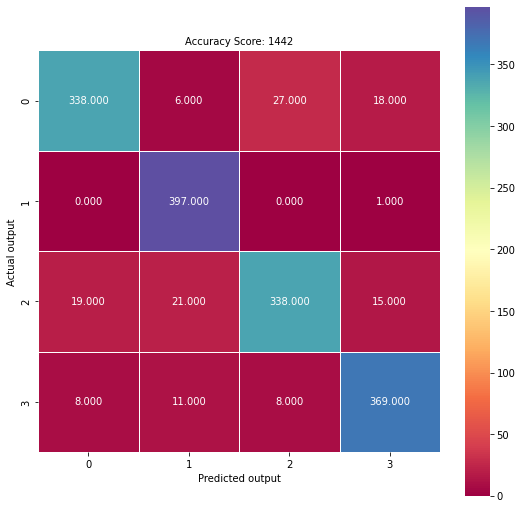

In [15]:
# Heatmap to visualize COnfusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Spectral')
plt.ylabel('Actual output')
plt.xlabel('Predicted output')
all_sampletitle= 'Accuracy Score: {0}'.format(score)
plt.title(all_sampletitle,size =10)